# Capacitated Vehicle Routing Problem

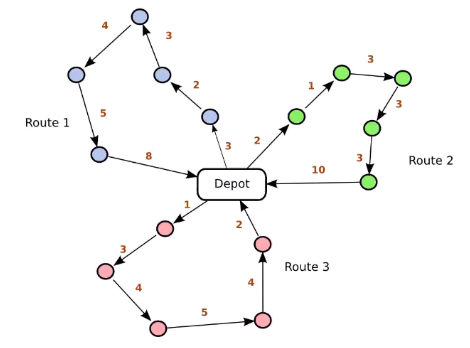

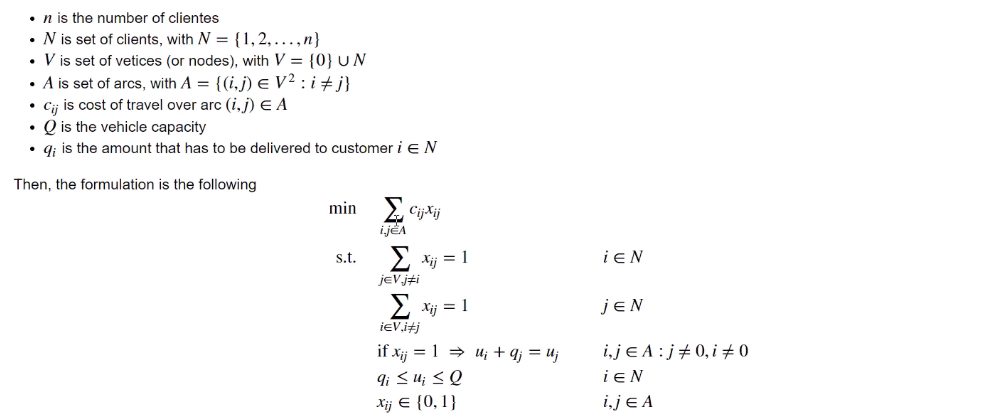

In [18]:
import numpy as np

In [19]:
rnd = np.random
rnd.seed(0)

In [20]:
n = 10
Q = 20
N = [i for i in range(1, n+1)]
V = [0] + N
q = {i: rnd.randint(1, 10) for i in N}

In [21]:
loc_x = rnd.rand(len(V)) * 200
loc_y = rnd.rand(len(V)) * 100

In [22]:
import matplotlib.pyplot as plt

(-5.390764142541891, 202.16699573081289, 7.525723005074169, 102.16355380509556)

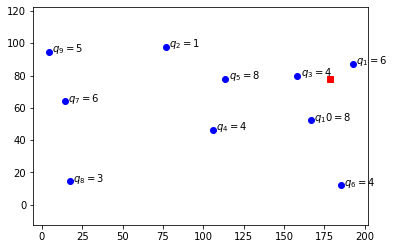

In [23]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')

for i in N:
    plt.annotate(f'$q_{i}={q[i]}$', (loc_x[i]+2, loc_y[i]))

plt.plot(loc_x[0], loc_y[0], marker='s', c='r')
plt.axis('equal')

In [24]:
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot((loc_x[i] - loc_x[j]), (loc_y[i] - loc_y[j])) for i, j in A}

In [25]:
from docplex.mp.model import Model

In [26]:
mdl = Model('CVRP')

In [27]:
x = mdl.binary_var_dict(A, name='x')
u = mdl.continuous_var_dict(N, ub=Q, name='u')

In [28]:
mdl.minimize(mdl.sum(c[i, j] * x[i, j] for i, j in A))

In [29]:
mdl.add_constraints(mdl.sum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.add_constraints(mdl.sum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i, j], u[i] + q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.add_constraints(u[i] >= q[i] for i in N)
mdl.parameters.timelimit = 15
solution = mdl.solve(log_output=True)

Version identifier: 20.1.0.1 | 2021-12-07 | 9dfdf6686
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               15
Found incumbent of value 1784.255531 after 0.00 sec. (0.01 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 45 coefficients.
Aggregator did 45 substitutions.
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.01 sec. (0.35 ticks)
Probing time = 0.00 sec. (0.32 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 65 rows, 165 columns, and 335 nonzeros.
Reduced MIP has 110 binaries, 0 generals, 0 SOSs, and 90 indicators.
Presolve time = 0.00 sec. (0.23 ticks)
Probing time = 0.00 sec. (0.31 ticks)
Clique table members: 65.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation

In [30]:
print(solution)

solution for: CVRP
objective: 726.249
x_0_2=1
x_0_5=1
x_0_10=1
x_1_0=1
x_2_9=1
x_3_0=1
x_4_0=1
x_5_3=1
x_6_1=1
x_7_8=1
x_8_4=1
x_9_7=1
x_10_6=1
u_1=18.000
u_2=1.000
u_3=20.000
u_4=19.000
u_5=16.000
u_6=12.000
u_7=12.000
u_8=15.000
u_9=6.000
u_10=8.000



In [31]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [32]:
active_arcs = [a for a in A if x[a].solution_value > 0.9]

In [33]:
active_arcs

[(0, 2),
 (0, 5),
 (0, 10),
 (1, 0),
 (2, 9),
 (3, 0),
 (4, 0),
 (5, 3),
 (6, 1),
 (7, 8),
 (8, 4),
 (9, 7),
 (10, 6)]

(-5.390764142541891, 202.16699573081289, 7.525723005074169, 102.16355380509556)

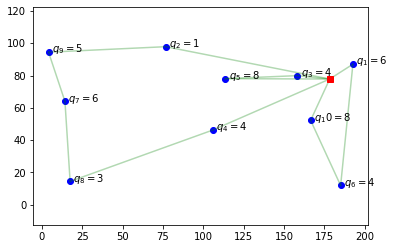

In [34]:
plt.scatter(loc_x[1:], loc_y[1:], c='b')

for i in N:
    plt.annotate(f'$q_{i}={q[i]}$', (loc_x[i]+2, loc_y[i]))

for i, j in active_arcs:
    plt.plot([loc_x[i], loc_x[j]], [loc_y[i], loc_y[j]], c='g', alpha=0.3)

plt.plot(loc_x[0], loc_y[0], marker='s', c='r')
plt.axis('equal')